
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

__*Important: I did this project when I was taking a course on Udemy (Ref: Portilla, J. (n.d.). Learn python for data science, structures, algorithms, interviews. Retrieved March 02, 2021, from https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) so the data was provided in the course and hence all the information in the data file is not real.__

## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Let's read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
ad_data=  pd.read_csv("advertising.csv")

**Let's check the ad_data**

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [17]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [18]:
ad_data.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

Let's use seaborn to explore the data!

**Create a histogram of the Age**

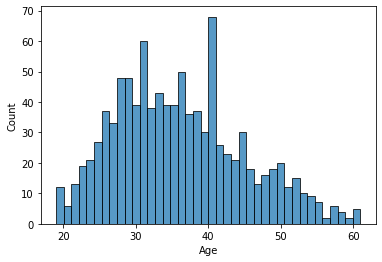

In [37]:
sns.histplot(ad_data['Age'], bins=40)

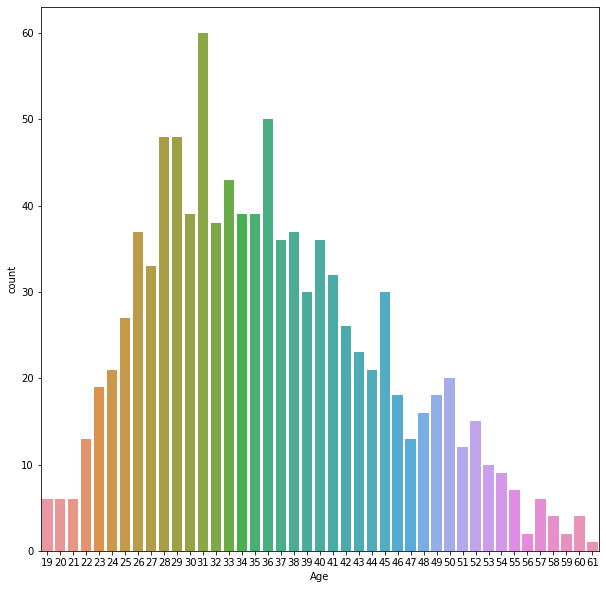

In [54]:
plt.figure(figsize=[10,10])
sns.countplot(x='Age', data=ad_data)

**Let's create a jointplot showing Area Income versus Age.**

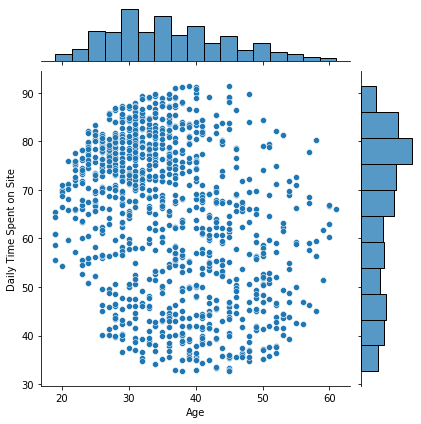

In [56]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data)

In [57]:
#understand the mean of all the features by Age
ad_data.groupby('Age').mean()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
Age,,,,,
19,60.966667,47296.481667,187.820000,0.666667,0.166667
20,66.708333,50704.606667,194.998333,0.833333,0.166667
21,68.460000,50764.571667,208.235000,0.666667,0.000000
22,71.010000,53363.022308,198.119231,0.307692,0.076923
23,68.333158,49851.940000,184.036842,0.526316,0.421053
24,71.245714,54449.234286,193.309048,0.428571,0.285714
25,71.360741,55830.655926,202.028519,0.666667,0.148148
26,69.430000,57440.580541,199.007027,0.486486,0.216216
27,71.093333,57441.166364,198.642727,0.515152,0.212121


**Let's create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

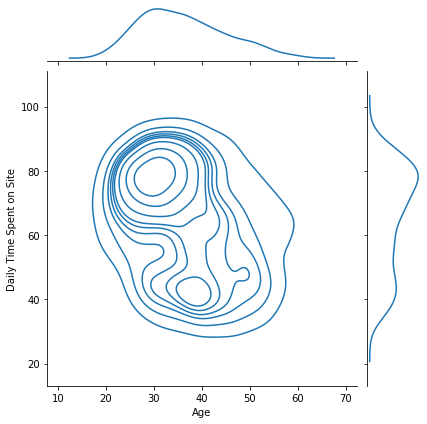

In [59]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde' )

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

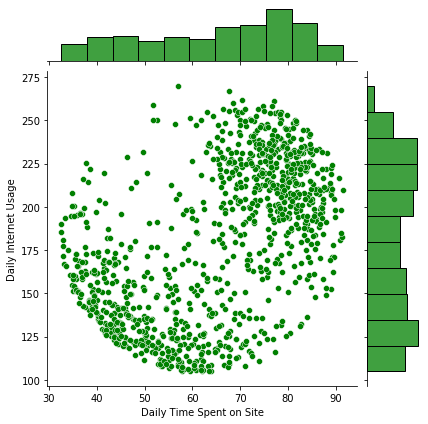

In [63]:
sns.jointplot(x='Daily Time Spent on Site', y= 'Daily Internet Usage', data=ad_data, color='green')

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

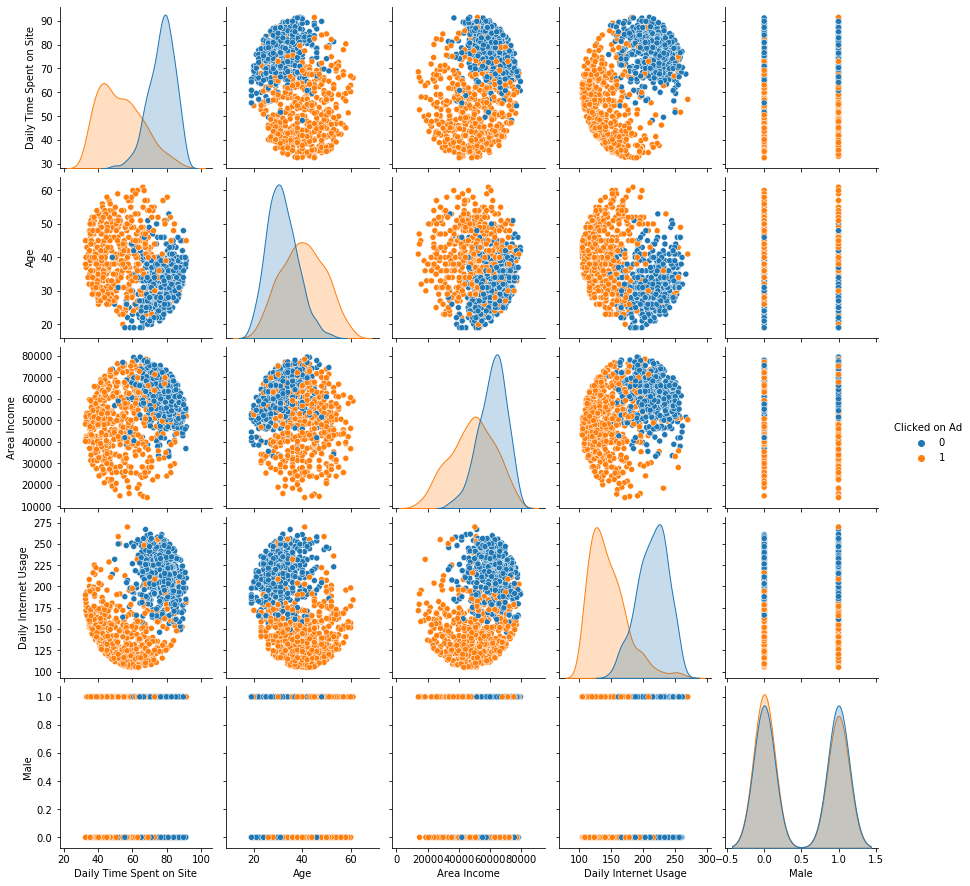

In [64]:
sns.pairplot(data=ad_data, hue= 'Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

In [65]:
from sklearn.model_selection import train_test_split

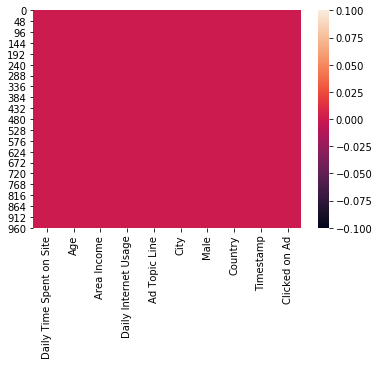

In [69]:
#checking to confirm if there are any null values
sns.heatmap(ad_data.isnull())

In [98]:
ad_data2= ad_data.drop(['Ad Topic Line','City', 'Country', 'Timestamp'], axis=1)

In [104]:
X= ad_data2.drop(['Clicked on Ad'],axis=1)

In [106]:
y=ad_data2['Clicked on Ad']

In [134]:
#I am setting test_size=0.33 and random_state=42, random_state can also be left blank but just so that I can refer back to these results in the future, I am setting it to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Let's Train and fit a logistic regression model on the training set.**

In [95]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel= LogisticRegression(solver='liblinear', multi_class='ovr')

In [135]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Let's now predict values for the testing data.**

In [136]:
pred= logmodel.predict(X_test)

**Let's create a classification report for the model.**

In [113]:
from sklearn import metrics

In [137]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [139]:
metrics.accuracy_score(y_test, pred)

0.9090909090909091

## Done!